<a href="https://colab.research.google.com/github/PrachiHarish/CV-Projects/blob/main/Copy_of_CNN_mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import*
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import RMSprop

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(x_train[3])
# print(y_train[0])
# plt.imshow(x_train[10],cmap=plt.get_cmap("gray"))
# plt.imshow(x_train[10])



11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


(-0.5, 27.5, 27.5, -0.5)

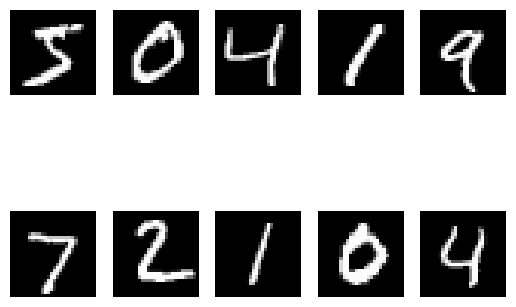

In [ ]:
# Plot 5 images as gray scale from train and test datasets
plt.subplot(2,5,1)
plt.imshow(x_train[0],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,2)
plt.imshow(x_train[1],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,3)
plt.imshow(x_train[2],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,4)
plt.imshow(x_train[3],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,5)
plt.imshow(x_train[4],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,6)
plt.imshow(x_test[0],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,7)
plt.imshow(x_test[1],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,8)
plt.imshow(x_test[2],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,9)
plt.imshow(x_test[3],cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.subplot(2,5,10)
plt.imshow(x_test[4],cmap=plt.get_cmap("gray"))
plt.axis("off")


In [ ]:
# set numeric type to float32 from unit8
# It reduces memory requirements by forcing the precision of the pixel values to be 32 bit
trainX=x_train.astype("float32")
testX=x_test.astype("float32")
# print(trainX[0])

# Normalize the value to [0,1]
trainX /=255
testX /=255
# print(trainX[0])

# Transform labels to one-hot encoding-convert 1-dimensional class arrays to 10-dimensions
#one-hot encode the lanels  - we have 10 output classes
# so "0" --> [1 0 0 0 0 0 0 0 0 0]; "1" --> [0 1 0 0 0 0 0 0 0 0]
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
# print(y_train[0])
print(y_train.shape)
print(y_test.shape)
print("one-hot encoded target training dataset")
print(y_train[0:5,])
print("one-hot encoded traget test dataset")
print(y_test[0:5,])

(60000, 10)
(10000, 10)
one-hot encoded target training dataset
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
one-hot encoded traget test dataset
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
print("Before reshape x_train and x_test dataset: ")
print(trainX.shape,testX.shape)

# reshape the train and test dataset into 4D array
x_train=trainX.reshape(trainX.shape[0],28,28,1)
x_test=testX.reshape(testX.shape[0],28,28,1)
print("After reshape x_train and x_test dataset")
print(x_train.shape,x_test.shape)


Before reshape x_train and x_test dataset: 
(60000, 28, 28) (10000, 28, 28)
After reshape x_train and x_test dataset
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# defining the CNN(LeNet5) model
#Instantiate an empty model

model=Sequential()

#C1 Convolutional Layer
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation="tanh",input_shape=(28,28,1),padding="valid"))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))

#C3 Convolutional Layer
model.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),activation="tanh",padding="valid"))

#S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))

#C5 Fully Connected Convolutional Layer
model.add(Conv2D(120,kernel_size=(1,1),strides=(1,1),activation="tanh",padding="valid"))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84,activation="tanh"))

#Output Layer with Softmax activation
model.add(Dense(10,activation="softmax"))

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_22 (Aver  (None, 12, 12, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_23 (Aver  (None, 4, 4, 16)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 120)         2040      
                                                                 
 flatten_11 (Flatten)        (None, 1920)            

In [ ]:
# Compile the model
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

#Fitting the model
history=model.fit(x_train,y_train,epochs=75,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/75
469/469 [==============================] - 3s 5ms/step - loss: 1.2014 - accuracy: 0.7080 - val_loss: 0.5266 - val_accuracy: 0.8707
Epoch 2/75
469/469 [==============================] - 3s 5ms/step - loss: 0.4617 - accuracy: 0.8747 - val_loss: 0.3846 - val_accuracy: 0.8949
Epoch 3/75
469/469 [==============================] - 3s 5ms/step - loss: 0.3730 - accuracy: 0.8942 - val_loss: 0.3288 - val_accuracy: 0.9070
Epoch 4/75
469/469 [==============================] - 2s 5ms/step - loss: 0.3281 - accuracy: 0.9056 - val_loss: 0.2945 - val_accuracy: 0.9162
Epoch 5/75
469/469 [==============================] - 2s 5ms/step - loss: 0.2969 - accuracy: 0.9143 - val_loss: 0.2678 - val_accuracy: 0.9232
Epoch 6/75
469/469 [==============================] - 2s 5ms/step - loss: 0.2719 - accuracy: 0.9212 - val_loss: 0.2465 - val_accuracy: 0.9291
Epoch 7/75
469/469 [==============================] - 2s 5ms/step - loss: 0.2508 - accuracy: 0.9272 - val_loss: 0.2279 - val_accuracy: 0.9335
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Loss')

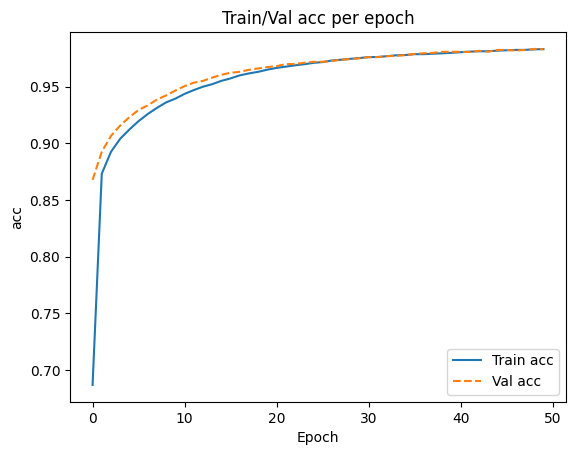

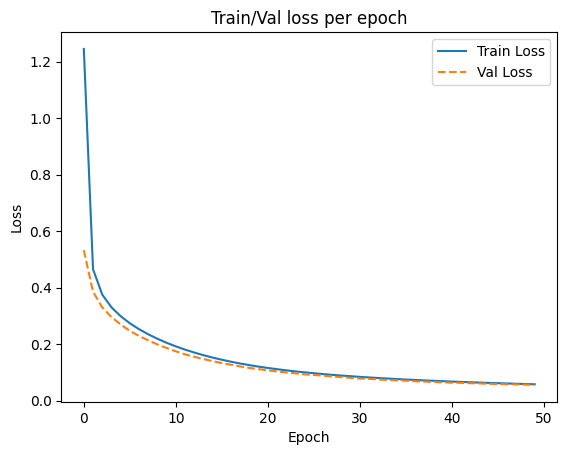

In [ ]:
# Plot the model accuracy on training and validation data
print(history.history.keys())

f,ax=plt.subplots()
ax.plot(history.history["accuracy"])
ax.plot(history.history["val_accuracy"],"--")
ax.legend(["Train acc","Val acc"])
ax.set_title("Train/Val acc per epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")

# Plot the model loss on training and val data
f,ax=plt.subplots()
ax.plot(history.history["loss"])
ax.plot(history.history["val_loss"],"--")
ax.legend(["Train Loss","Val Loss"])
ax.set_title("Train/Val loss per epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test acc:",score[1])

Test loss: 0.05566837266087532
Test acc: 0.9829999804496765


In [ ]:
y_pred=model.predict(x_test)
# print(y_pred)
y_test_class=np.argmax(y_test,axis=1)
print("Test Hand written digit")
print(y_test_class)
y_pred_class=np.argmax(y_pred,axis=1)
print("Predicted hand written digit")
print(y_pred_class)

313/313 [==============================] - 1s 2ms/step
Test Hand written digit
[7 2 1 ... 4 5 6]
Predicted hand written digit
[7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cr=classification_report(y_test_class,y_pred_class)
print(cr)

cm=confusion_matrix(y_test_class,y_pred_class)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 970    0    1    0    1    0    2    2    4    0]
 [   0 1125    2    1    0    1    2    1    3    0]
 [   0    2 1020    3    1    0    0    3    3    0]
 [   0    0    3  991    0    6    0    4    5    1]
 [   0    0    2    1  965   

In [ ]:
# How many mismatched
(np.argmax(y_pred,axis=1)!=np.argmax(y_test,axis=1)).sum()

170

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Testing Accuracy: {test_acc:.4f}')


Training Accuracy: 0.9873
Testing Accuracy: 0.9858
